# Classification by a neural network using Keras
* Use the deep learning workflow to structure the notebook”
* “Explore the dataset using pandas and seaborn”
* “Use one-hot encoding to prepare data for classification in Keras”
* “Describe a fully connected layer”
* “Implement a fully connected layer with Keras”
* “Use Keras to train a small fully connected network on prepared data”
* “Interpret the loss curve of the training process”
* “Use a confusion matrix to measure the trained networks’ performance on a test set”

## 1. Formulate/outline the problem: penguin classification

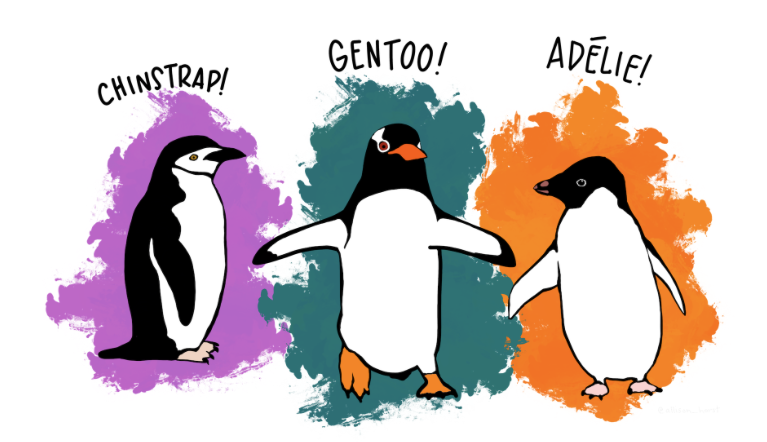

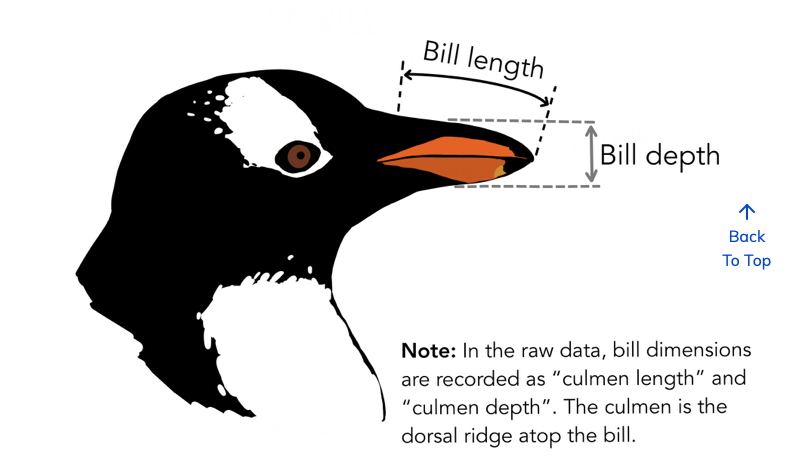

## 2. Identify inputs and outputs

In [1]:
from tensorflow import keras

In [2]:
keras.backend.clear_session()

In [3]:
import seaborn
print(seaborn.__version__)

0.11.2


In [4]:
import sklearn

In [5]:
import seaborn as sns

In [6]:
penguins = sns.load_dataset('penguins')

In [7]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
penguins.shape

(344, 7)

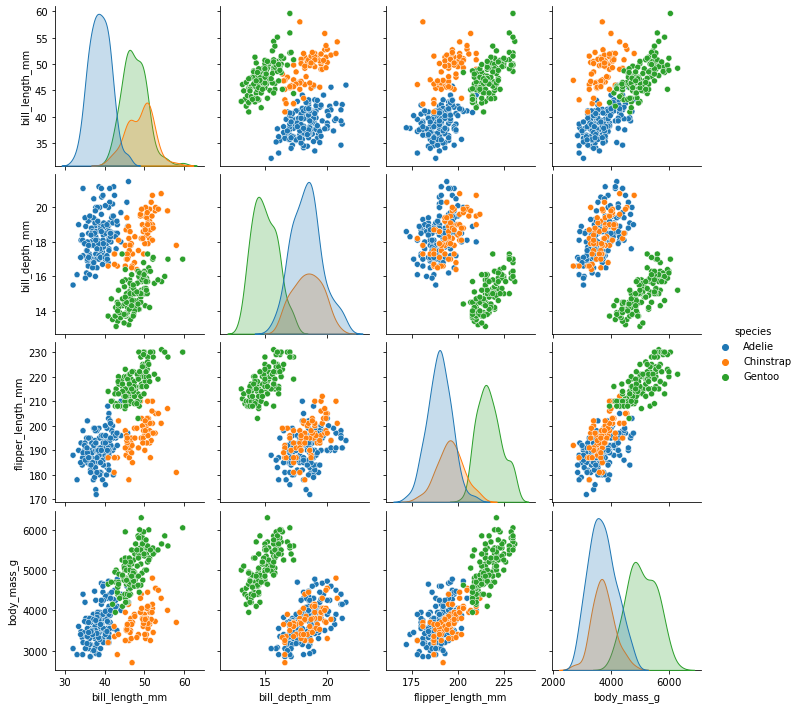

In [9]:
sns.pairplot(penguins, hue="species")

## 3. Prepare data

In [10]:
penguins_filtered = penguins.drop(columns = ['island', 'sex'])

In [11]:
penguins_filtered = penguins_filtered.dropna()

In [12]:
penguins_features = penguins_filtered.drop(columns=['species'])

In [13]:
import pandas as pd

In [14]:
target = pd.get_dummies(penguins_filtered['species'], dtype=int)

In [15]:
target.head()

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(penguins_features, target,
                                                    test_size=0.2, 
                                                   random_state=0,
                                                   shuffle=True,
                                                   stratify=target)

## 4. Build an architecture from scratch or choose a pretrained model

In [18]:
from tensorflow import keras

In [19]:
from numpy.random import seed
seed(1)

In [20]:
### CORRECTION
#from tensorflow.random import set_seed
#set_seed(2)
## This should have been:
keras.utils.set_random_seed(2)

In [21]:
# input
# hidden_layer
# output

In [22]:
inputs = keras.Input(shape=X_train.shape[1])

In [23]:
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)

In [24]:
output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)

In [25]:
model = keras.Model(inputs=inputs, outputs=output_layer)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Choose a loss function and optimizer

In [27]:
model.compile(optimizer='adam' , loss=keras.losses.CategoricalCrossentropy())

## 6. Train model

In [28]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 811us/step - loss: 623.0574
Epoch 2/100
9/9 [==============================] - 0s 579us/step - loss: 516.2007
Epoch 3/100
9/9 [==============================] - 0s 650us/step - loss: 408.5740
Epoch 4/100
9/9 [==============================] - 0s 631us/step - loss: 300.2234
Epoch 5/100
9/9 [==============================] - 0s 589us/step - loss: 199.2896
Epoch 6/100
9/9 [==============================] - 0s 600us/step - loss: 122.2795
Epoch 7/100
9/9 [==============================] - 0s 594us/step - loss: 49.2803
Epoch 8/100
9/9 [==============================] - 0s 611us/step - loss: 29.0868
Epoch 9/100
9/9 [==============================] - 0s 648us/step - loss: 18.6026
Epoch 10/100
9/9 [==============================] - 0s 630us/step - loss: 17.2274
Epoch 11/100
9/9 [==============================] - 0s 767us/step - loss: 15.3040
Epoch 12/100
9/9 [==============================] - 0s 624us/step - loss: 15.1361
Epoch 13/100
9/9 [=

<AxesSubplot:>

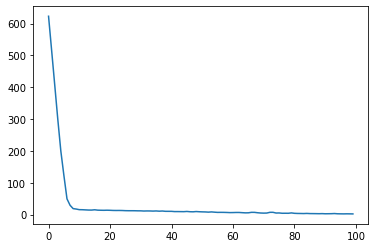

In [29]:
sns.lineplot(x=history.epoch, y=history.history['loss'])

## 7: Perform a prediction/classification

In [36]:
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
45,39.6,18.8,190.0,4600.0
71,39.7,18.4,190.0,3900.0
103,37.8,20.0,190.0,4250.0
328,43.3,14.0,208.0,4575.0
209,49.3,19.9,203.0,4050.0


In [30]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 834us/step


In [37]:
y_pred

array([[9.99708712e-01, 1.50471442e-06, 2.89703195e-04],
       [9.67634261e-01, 3.43677774e-03, 2.89289970e-02],
       [9.99677300e-01, 3.81366808e-05, 2.84594193e-04],
       [6.01144135e-01, 2.60873669e-04, 3.98595065e-01],
       [2.59402245e-01, 5.40842349e-03, 7.35189319e-01],
       [2.42298052e-01, 2.19696609e-04, 7.57482231e-01],
       [9.95643735e-01, 1.14784541e-03, 3.20842350e-03],
       [2.19034329e-01, 3.87432218e-01, 3.93533409e-01],
       [8.63133073e-01, 1.57324666e-05, 1.36851192e-01],
       [3.73025328e-01, 2.11653005e-05, 6.26953542e-01],
       [9.97322500e-01, 1.05952915e-06, 2.67642224e-03],
       [3.50927800e-01, 2.22128801e-05, 6.49049997e-01],
       [4.07416791e-01, 4.79585707e-01, 1.12997532e-01],
       [2.42062677e-02, 9.19433415e-01, 5.63603267e-02],
       [1.42769903e-01, 6.28777921e-01, 2.28452206e-01],
       [2.44487431e-02, 2.46007554e-03, 9.73091125e-01],
       [3.52106988e-01, 5.27640402e-01, 1.20252557e-01],
       [2.80750215e-01, 5.19413

In [32]:
prediction = pd.DataFrame(y_pred, columns=target.columns)
prediction.head()

,Adelie,Chinstrap,Gentoo
0,0.999709,0.000002,0.000290
1,0.967634,0.003437,0.028929
2,0.999677,0.000038,0.000285
3,0.601144,0.000261,0.398595
4,0.259402,0.005408,0.735189


In [33]:
predicted_species = prediction.idxmax(axis="columns")
predicted_species.head()


0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Gentoo
dtype: object

In [34]:
from sklearn.metrics import confusion_matrix
true_species = y_test.idxmax(axis="columns")

In [35]:
true_species.head()

45        Adelie
71        Adelie
103       Adelie
328       Gentoo
209    Chinstrap
dtype: object

In [38]:
matrix = confusion_matrix(true_species, predicted_species)

In [39]:
matrix

array([[18, 10,  2],
       [ 0,  0, 14],
       [18,  0,  7]])

In [40]:
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values,
                            columns=y_test.columns.values)

In [41]:
confusion_df.index.name = "True label"
confusion_df.columns.name = "Predicted label"

<AxesSubplot:xlabel='Predicted label', ylabel='True label'>

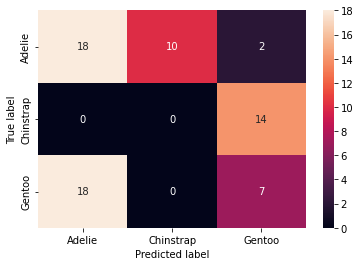

In [42]:
sns.heatmap(confusion_df, annot=True)

## Confusion Matrix
Measure the performance of the neural network you trained and
visualize a confusion matrix.

- Did the neural network perform well on the test set?
- Did you expect this from the training loss you saw?
- What could we do to improve the performance?

## 9: Tune hyperparameters

## 10: Share model

In [43]:
model.save('my_first_cute_penguin_model')

INFO:tensorflow:Assets written to: my_first_cute_penguin_model/assets


INFO:tensorflow:Assets written to: my_first_cute_penguin_model/assets


In [44]:
loaded_model = keras.models.load_model('my_first_cute_penguin_model')

In [45]:
loaded_model

In [46]:
loaded_model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


array([[9.99708712e-01, 1.50471442e-06, 2.89703195e-04],
       [9.67634261e-01, 3.43677774e-03, 2.89289970e-02],
       [9.99677300e-01, 3.81366808e-05, 2.84594193e-04],
       [6.01144135e-01, 2.60873669e-04, 3.98595065e-01],
       [2.59402245e-01, 5.40842349e-03, 7.35189319e-01],
       [2.42298052e-01, 2.19696609e-04, 7.57482231e-01],
       [9.95643735e-01, 1.14784541e-03, 3.20842350e-03],
       [2.19034329e-01, 3.87432218e-01, 3.93533409e-01],
       [8.63133073e-01, 1.57324666e-05, 1.36851192e-01],
       [3.73025328e-01, 2.11653005e-05, 6.26953542e-01],
       [9.97322500e-01, 1.05952915e-06, 2.67642224e-03],
       [3.50927800e-01, 2.22128801e-05, 6.49049997e-01],
       [4.07416791e-01, 4.79585707e-01, 1.12997532e-01],
       [2.42062677e-02, 9.19433415e-01, 5.63603267e-02],
       [1.42769903e-01, 6.28777921e-01, 2.28452206e-01],
       [2.44487431e-02, 2.46007554e-03, 9.73091125e-01],
       [3.52106988e-01, 5.27640402e-01, 1.20252557e-01],
       [2.80750215e-01, 5.19413

## Key points
1. Use the workflow to structure your work
2. You now know how to create a model from scratch in keras
3. First take a lot of shortcuts, get your pipeline up and running, then you start adding new stuff